# EDA

In this notebook you will find more analysis for the data set

### Una vez limpiado los datos, hay diferentes formas de llevar a cabo el análisis de las columnas de texto, especialmente las que contienen diagnósticos:

1. **Análisis de frecuencia de palabras**: Una forma sencilla de empezar es simplemente contar la frecuencia de cada diagnóstico único. Esto puede ayudar a identificar los diagnósticos más comunes.

2. **Nube de palabras**: Una nube de palabras visualiza las palabras más frecuentes en tu texto, donde el tamaño de cada palabra es proporcional a su frecuencia.

3. **Análisis de sentimientos**: Aunque es más común en el análisis de comentarios o reseñas de productos, el análisis de sentimientos podría ser útil si los diagnósticos o los motivos de ingreso contienen cualquier tipo de subjetividad.

4. **Análisis de temas con LDA (Latent Dirichlet Allocation)**: Esta es una forma de modelado de temas que puede ayudar a identificar los temas subyacentes en los diagnósticos.

5. **Agrupación de texto (clustering)**: Utilizando técnicas como K-means, se puede agrupar diagnósticos similares juntos. Esto puede ser especialmente útil si existe un gran número de diagnósticos únicos.

6. **Word Embeddings (incrustaciones de palabras)**: Herramientas como Word2Vec o GloVe pueden ayudar a convertir los diagnósticos en vectores numéricos para realizar análisis más avanzados.

Para empezar con alguno de estos, se necesita una forma de convertir los diagnósticos de texto en un formato que los algoritmos puedan entender. Algunas técnicas comunes:

1. **Bolsa de palabras (Bag of Words)**: Esta es la forma más sencilla de convertir texto en números. Simplemente cuenta la cantidad de veces que cada palabra aparece.

2. **TF-IDF**: Similar a la Bolsa de Palabras, pero además de contar las frecuencias de las palabras, también toma en cuenta la frecuencia de las palabras en todo el corpus del documento. Esto ayuda a reducir la importancia de las palabras que aparecen con frecuencia, como "el", "un", etc.

3. **Tokenización**: Esto implica dividir el texto en palabras individuales (o tokens). Esto puede ser útil para eliminar las palabras comunes (también conocidas como stopwords), así como para el análisis de la frecuencia de las palabras.

4. **One-hot encoding**: Esta es otra forma de convertir texto en números al crear una matriz de variables binarias para cada palabra única.

La técnica a utilizar dependerá del problema específico que se esté intentando resolver, así como de la naturaleza de los datos.

In [2]:
# Importamos las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [3]:
%load_ext kedro.ipython

[09/17/23 13:14:43] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:136
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\hado.                                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/17/23 13:14:43] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Programs\Python\Python310\lib\importlib\__init__.                
                             py:126: DeprecationWarning: `kedro.extras.datasets` is deprecated and                 
                             will be removed in Kedro 0.19, install `kedro-datasets` instead by                    
                             running `pip install kedro-datasets`.                                                 
                               return _bootstrap._gcd_import(name[level:], package, level)                         
                                                                                                                   

[09/17/23 13:14:44] INFO     Kedro project hado                                                     __init__.py:105

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:106
                             'pipelines'                                                                           

[09/17/23 13:14:45] INFO     Registered line magic 'run_viz'                                        __init__.py:112

In [4]:
catalog.list('hado')

['hado_22',
 'hado_21',
 'hado_20',
 'hado_19',
 'hado_18',
 'hado_17',
 'strip_lower_hado_17',
 'strip_lower_hado_18',
 'strip_lower_hado_19',
 'strip_lower_hado_20',
 'strip_lower_hado_21',
 'strip_lower_hado_22',
 'hado_concat',
 'hado_clean',
 'hado_clean_na',
 'hado_replaced_words',
 'hado_cleaned',
 'hado_cleaned_sedation',
 'hado_cleaned_medication',
 'hado_categorized',
 'hado_final',
 'hado_encoded']

In [5]:
df = catalog.load('hado_final')

                    INFO     Loading data from 'hado_final' (CSVDataSet)...                     data_catalog.py:345

In [6]:
df.head()

,h_procedencia,hospital_category,s_procedencia,procedencia_category,diagnostico,diagnosis_category,motivo_ing,ingreso_category,motivo_alta,alta_category,...,categorized_combined_otros,tiene_sedacion,morfina,midazolam,buscapina,haloperidol,levomepromazina,medico,ayuntamiento,year
0,gil casares,Santiago,upal,Unidad Paliativos,cancer orl,Canceres y neoplasias,control sintomas,Sintomas,reingreso,Complicaciones,...,Otros,0,0,0,0,0,0,valdes,desconocido,2017
1,clinico,Santiago,oncologia,Oncologia,melanoma vulvar,Neurologicas,mal control dolor,Sintomas,exitus,Exitus,...,Otros,0,0,0,0,0,0,galego feal,desconocido,2017
2,clinico,Santiago,mir,MIR,cancer broncogenico,Canceres y neoplasias,control evolutivo,Evaluaciones,fin cuidados,Otros,...,Desconocido/No especificado,0,0,0,0,0,0,lopez renedo,desconocido,2017
3,clinico,Santiago,digestivo,Digestivo,cirrosis hepatica,Hepaticas y pancreaticas,administracion octreotido,Otros,fin cuidados,Otros,...,Desconocido/No especificado,0,0,0,0,0,0,lopez renedo,desconocido,2017
4,clinico,Santiago,urgencias,Urgencias,neoplasia de mama estadio IV,Canceres y neoplasias,control sintomas,Sintomas,exitus,Exitus,...,Desconocido/No especificado,0,0,0,0,0,0,lopez renedo,desconocido,2017


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   h_procedencia               4013 non-null   object
 1   hospital_category           4013 non-null   object
 2   s_procedencia               4013 non-null   object
 3   procedencia_category        4013 non-null   object
 4   diagnostico                 4013 non-null   object
 5   diagnosis_category          4013 non-null   object
 6   motivo_ing                  4013 non-null   object
 7   ingreso_category            4013 non-null   object
 8   motivo_alta                 4013 non-null   object
 9   alta_category               4013 non-null   object
 10  fecha_alta                  4013 non-null   object
 11  ap                          4013 non-null   object
 12  n_estancias                 4013 non-null   int64 
 13  n_visitas                   4013 non-null   int6

# 1. Análisis de frecuencia

In [7]:
diagnostic_counts = df['diagnostico'].value_counts()

In [8]:
diagnostic_counts.sort_values(ascending=False)

ITU                                     173
infeccion respiratoria                  145
infeccion urinaria                      113
insuficiencia cardiaca                   73
cancer de colon                          70
                                       ... 
neo vejiga estadio IV                     1
celulitis miembro superior izquierdo      1
cancer pulmon fistula esofagica           1
carcinoma colon estadio IV                1
neoplasia pulmon                          1
Name: diagnostico, Length: 1513, dtype: int64

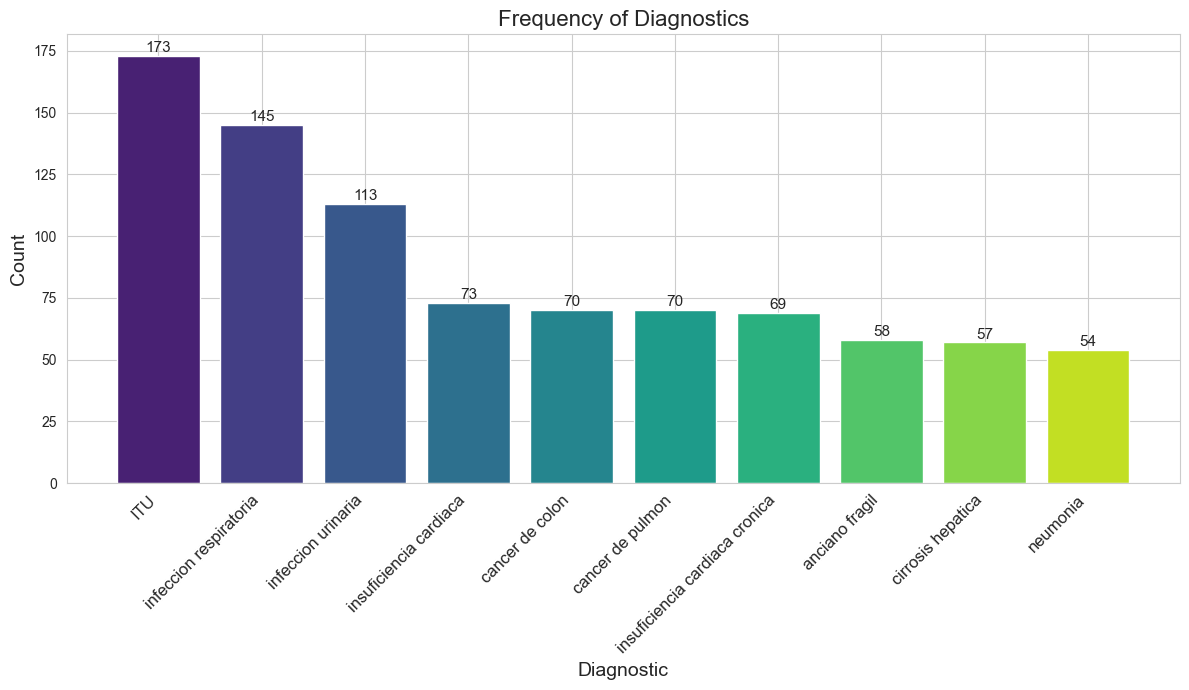

In [13]:
# Create the frequency plot
# Establecer el estilo de Seaborn
sns.set_style("whitegrid")

# Crear el plot
fig, ax = plt.subplots(figsize=(12,7))

# Obtener los primeros 10 diagnósticos y sus valores
top_diagnostics = diagnostic_counts.head(10)
bar_colors = sns.color_palette("viridis", len(top_diagnostics))

# Crear el gráfico de barras
bars = plt.bar(top_diagnostics.index, top_diagnostics.values, color=bar_colors)

# Rotar las etiquetas del eje x para mejor lectura
plt.xticks(rotation=45, ha="right", fontsize=12)

# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            '%d' % int(height), ha='center', va='bottom', fontsize=11)

# Configurar etiquetas y título
plt.xlabel('Diagnostic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Frequency of Diagnostics', fontsize=16)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# 2. Análisis de correlación

In [28]:
# Para correlaciones con variables numéricas:

df.groupby('diagnostico')['n_visitas'].mean().sort_values(ascending=False)

diagnostico
ulceras de mal conmtrol en eeii       60.0
ulceras vasculares paciente fragil    56.0
upps esclerosis multiple epilepsia    51.0
obliteracion iliaca                   51.0
cancer de recto fournier              50.0
                                      ... 
itudeterioro cognitivo                 0.0
ITU acv                                0.0
infeccion artroplastia hombro izq      0.0
infeccion driveline                    0.0
obliteracion distal mii                0.0
Name: n_visitas, Length: 1513, dtype: float64

In [30]:
df.groupby('diagnostico')['n_estancias'].mean().sort_values(ascending=False)

diagnostico
ulceras de mal conmtrol en eeii        304.0
upps esclerosis multiple epilepsia     204.0
niemanpick                             180.0
pseudoartrosis de tibia                171.0
ulcera vascular eeii izquierda         150.0
                                       ...  
encefalopatia postraumatica severa       1.0
posible sepsis de origen no filiado      1.0
sde mielodisplasicolma                   0.0
cancer mamam estadioiv                   0.0
adenoma de pulmon estadio IV             0.0
Name: n_estancias, Length: 1513, dtype: float64

In [39]:
pd.crosstab(df['diagnostico'], df['tiene_sedacion']).sum().sort_values(ascending=False)
# 0 = no 1=si

tiene_sedacion
0    3320
1     693
dtype: int64

In [38]:
# Para correlaciones con variables categóricas podrías usar tablas de contingencia
ct = pd.crosstab(df['diagnostico'], df['tiene_sedacion'])
sorted_ct = ct.sort_values(by=1, ascending=False)
sorted_ct

tiene_sedacion,0,1
diagnostico,,
cancer de colon,48,22
cancer de pulmon,51,19
glioblastoma,8,15
hepatocarcinoma,17,13
anciano fragil,46,12
...,...,...
deterioro anciana fragil,1,0
desnutricion proteicacalorica,1,0
deshiodratacion,1,0


In [45]:
ct = pd.crosstab(df['diagnostico'], df['diagnosis_category'])
sorted_ct = ct.sort_values(by='Hematologicas',ascending=False)
sorted_ct

diagnosis_category,Canceres y neoplasias,Cardiacas,Hematologicas,Hepaticas y pancreaticas,Infecciones,Musculoesqueléticas y de piel,Neurologicas,Otros,Pulmonares y respiratorias,Renales y urinarias
diagnostico,,,,,,,,,,
anemia,0,0,28,0,0,0,0,0,0,0
sindrome mielodisplasico,0,0,15,0,0,0,0,0,0,0
anemia cronica,0,0,11,0,0,0,0,0,0,0
anemia cronica no filiada,0,0,8,0,0,0,0,0,0,0
anemia multifactorial,0,0,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
cirrosis colonizado por bleas,0,0,0,1,0,0,0,0,0,0
cirrosis,0,0,0,9,0,0,0,0,0,0
ciatalgia,0,0,0,0,0,0,0,1,0,0


In [41]:
df['diagnosis_category'].value_counts()

Otros                            1149
Canceres y neoplasias             792
Pulmonares y respiratorias        438
Infecciones                       339
Hepaticas y pancreaticas          283
Neurologicas                      258
Cardiacas                         244
Renales y urinarias               213
Musculoesqueléticas y de piel     185
Hematologicas                     112
Name: diagnosis_category, dtype: int64

# 3. Análisis temporal

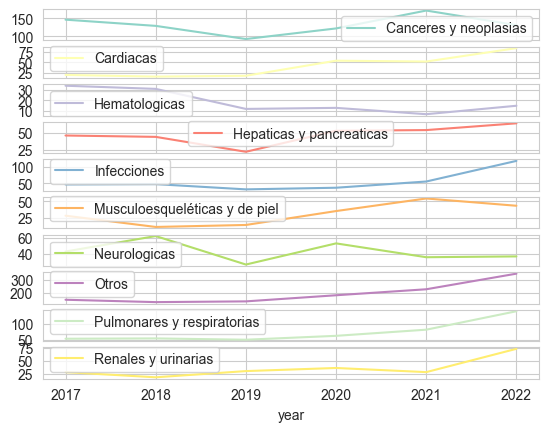

In [50]:
df.groupby(['year', 'diagnosis_category']).size().unstack().plot(kind='line', subplots=True)
plt.show();

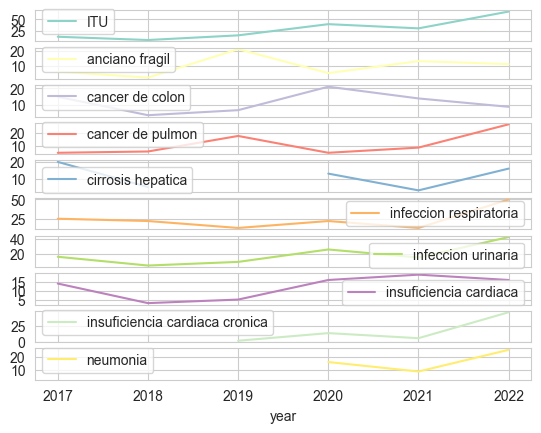

In [51]:
top_diagnoses = df['diagnostico'].value_counts().index[:10]  # top N diagnoses
df_top_diagnoses = df[df['diagnostico'].isin(top_diagnoses)]

df_top_diagnoses.groupby(['year', 'diagnostico']).size().unstack().plot(kind='line', subplots=True);

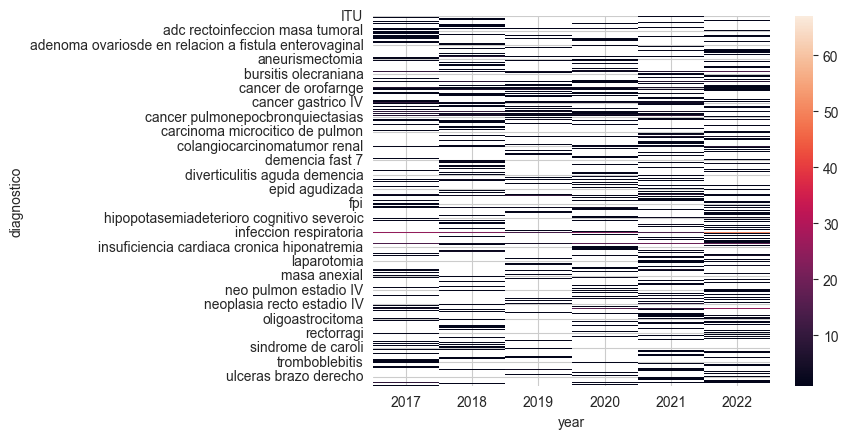

In [52]:
diagnosis_counts = df.groupby(['diagnostico', 'year']).size().unstack()
sns.heatmap(diagnosis_counts);

<Axes: xlabel='year', ylabel='diagnosis_category'>

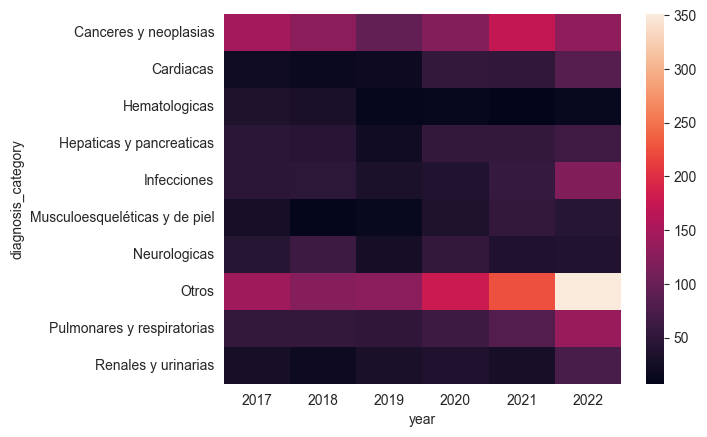

In [55]:
diagnosis_counts = df.groupby(['diagnosis_category', 'year']).size().unstack()
sns.heatmap(diagnosis_counts)
plt.show();

# 4. Análisis de texto

Dado que el conjunto de diagnósticos tienen formato de texto libre, pueden usarse técnicas de procesamiento de lenguaje natural (NLP) para analizarlos. Algunas posibles técnicas que podrías considerarse incluyen:

1. Extracción de Entidades: Esta técnica se refiere a la identificación de términos o frases específicas en el texto que corresponden a ciertas categorías, como enfermedades o condiciones médicas. Podría intentar extraerse términos médicos comunes de diagnósticos y luego usarlos para el análisis.

2. Tokenización y conteo de palabras: Puede dividirse cada diagnóstico en palabras individuales (tokens), y luego contar cuántas veces aparece cada palabra. Esto puede dar una idea de los términos más comunes en diagnósticos.

````python
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
````

3. Análisis de Sentimientos: Aunque esto se usa más comúnmente con texto que expresa opiniones o emociones, podrías usar el análisis de sentimientos para identificar diagnósticos que indican condiciones especialmente graves o menos graves.

4. Agrupación de texto (clustering): Podrían usarse técnicas de agrupación como `K-means` para agrupar diagnósticos similares. Antes de hacer esto, necesito convertir los diagnósticos en un formato numérico usando por ejemplo, TF-IDF.

````python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
````

5. Identificación de Temas (Topic Modeling): Podrían usarse técnicas de identificación de temas como LDA (Latent Dirichlet Allocation) para identificar los "temas" comunes en diagnósticos.


````python
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])

lda = LatentDirichletAllocation(n_components=5)
lda.fit(X)
````


In [6]:
# Reemplazar valores nulos con una cadena vacía
# En los datos procesado ya no tenemos NAs
df['diagnostico'] = df['diagnostico'].fillna('')

# Ahora puedes aplicar CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [7]:
# Palabras más comunes:

# Sumar las ocurrencias de cada palabra
sum_words = word_counts.sum(axis=0)

# Ordenar las palabras según su frecuencia total
sorted_words = sum_words.sort_values(ascending=False)

# Mostrar las 10 palabras más comunes
print(sorted_words.head(20))

cancer           807
de               547
iv               400
infeccion        390
estadio          386
insuficiencia    244
pulmon           222
itu              222
respiratoria     207
cardiaca         204
colon            199
urinaria         148
cronica          144
neoplasia        131
fragil           130
demencia         107
pancreas         102
cirrosis          87
deterioro         87
cognitivo         80
dtype: int64


In [20]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])

kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=5, n_init='auto')

In [23]:
# Assume X tf-idf matrix
# 1. Convert sparse matrix to dense array
X_dense = X.toarray()

# 2. Use PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

X_pca

array([[ 0.14967879, -0.02348305],
       [-0.04756016,  0.03117911],
       [ 0.12909534, -0.01837031],
       ...,
       [-0.04746805,  0.03123283],
       [-0.22948382,  0.7483699 ],
       [-0.05432149,  0.03658123]])

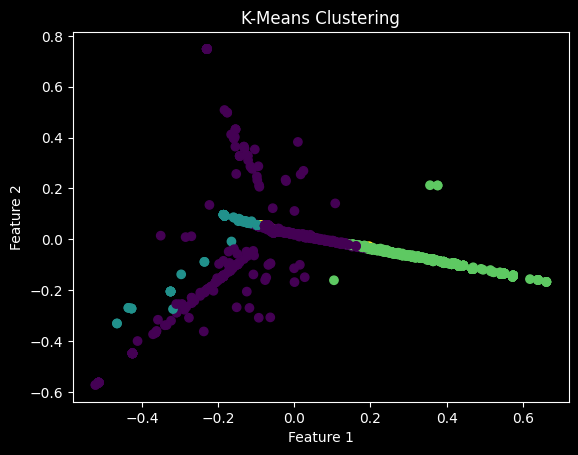

In [24]:
# Visualize the clusters:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show();

In [26]:
# Evaluate the clustering:

silhouette_score(X, kmeans.labels_)

# This will print out the silhouette score for the clustering. The silhouette score is a measure of how well each data point is assigned to its cluster. A higher silhouette score indicates a better clustering.

0.07450280722557304

In [36]:
# Use the clustering to make predictions

new_data_point = df['motivo_alta']
new_data_point_vectorized = vectorizer.transform(new_data_point)

cluster_label = kmeans.predict(new_data_point_vectorized)
# This will predict the cluster label for a new data point. You can use this to assign new data points to clusters.

In [40]:
silhouette_score(new_data_point_vectorized, kmeans.labels_)

-0.9550465252558359

In [37]:
new_data_point_vectorized_dense = new_data_point_vectorized.toarray()

# 2. Use PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
new_data_point_vectorized_pca = pca.fit_transform(new_data_point_vectorized_dense)

new_data_point_vectorized_pca

array([[-0.01486075, -0.00253855],
       [-0.01486075, -0.00253855],
       [-0.01486075, -0.00253855],
       ...,
       [-0.01486075, -0.00253855],
       [-0.01486075, -0.00253855],
       [-0.01486075, -0.00253855]])

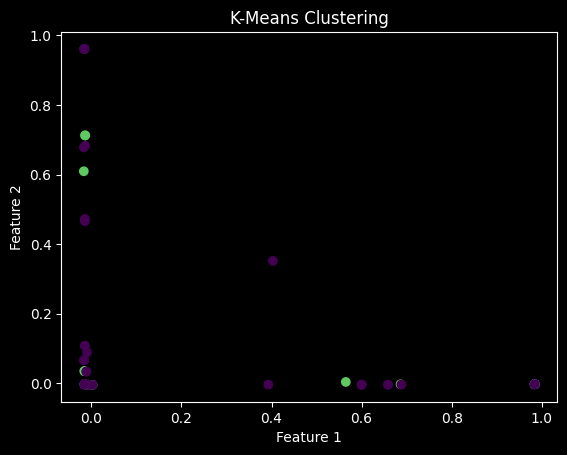

In [38]:
plt.scatter(new_data_point_vectorized_pca[:, 0], new_data_point_vectorized_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show();

In [41]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])

lda = LatentDirichletAllocation(n_components=5)
lda.fit(X)

# LDA tries to discover topics that are present in the documents. Each topic is a distribution over words, and each document is represented as a distribution over topics.

LatentDirichletAllocation(n_components=5)

In [42]:
# Extracting the words from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the top words for each topic
n_top_words = 10
topic_words = {}

for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    topic_words[f"Topic {topic_idx}"] = top_words

topic_words

# The top words for each topic, which can help in interpreting what each topic represents.

{'Topic 0': ['de',
  'cirrosis',
  'cognitivo',
  'deterioro',
  'neoplasia',
  'hepatica',
  'anemia',
  'pulmon',
  'amputacion',
  'glioblastoma'],
 'Topic 1': ['insuficiencia',
  'cardiaca',
  'cronica',
  'pancreas',
  'neumonia',
  'demencia',
  'renal',
  'aguda',
  'celulitis',
  'leucemia'],
 'Topic 2': ['cancer',
  'infeccion',
  'de',
  'respiratoria',
  'pulmon',
  'urinaria',
  'colon',
  'bronquiectasias',
  'infectadas',
  'gastrico'],
 'Topic 3': ['iv',
  'estadio',
  'itu',
  'cancer',
  'fragil',
  'colon',
  'anciano',
  'mama',
  'de',
  'neoplasia'],
 'Topic 4': ['ulceras',
  'ela',
  'demencia',
  'hepatocarcinoma',
  'avanzada',
  'linfoma',
  'epoc',
  'enfermedad',
  'por',
  'de']}

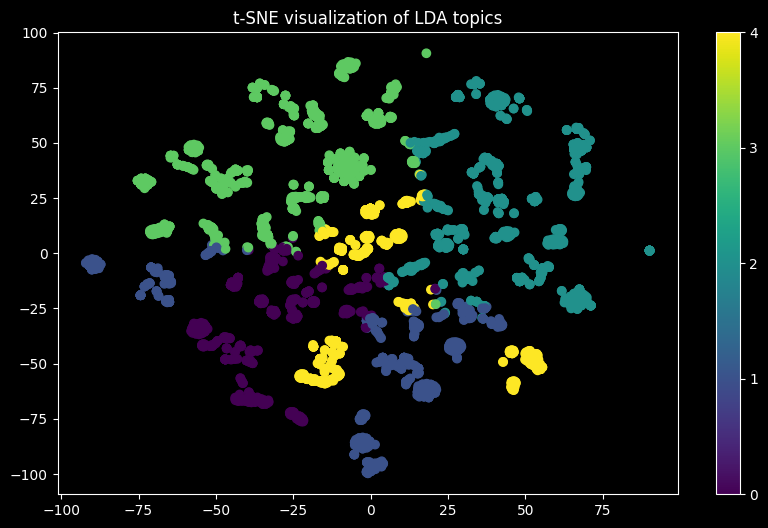

In [44]:
# Get the topic distribution for each document
doc_topic_dist = lda.transform(X)

# Get the most dominant topic for each document
dominant_topic = np.argmax(doc_topic_dist, axis=1)

# Apply t-SNE for dimensionality reduction
tsne_model = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_lda = tsne_model.fit_transform(doc_topic_dist)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(tsne_lda[:, 0], tsne_lda[:, 1], c=dominant_topic, cmap="viridis")
plt.colorbar(ticks=range(lda.n_components))
plt.title("t-SNE visualization of LDA topics")
plt.show()


# 5. Análisis predictivo

In [64]:
# Sample new document
new_document = df["ap"]

# Vectorize the new document
new_doc_vectorized = vectorizer.transform(new_document)

# Get topic distribution for new document
new_doc_topic_dist = lda.transform(new_doc_vectorized)

# Determine the most dominant topic
dominant_topic_new_doc = np.argmax(new_doc_topic_dist)

dominant_topic_new_doc, new_doc_topic_dist[0]

# Topic 4: 59,89% predominantly belongs to Topic 4 but it also has some components of the other topics.

(2455, array([0.10026995, 0.10000066, 0.10000035, 0.10091379, 0.59881526]))

# 6. Evaluación de los síntomas: 
¿Cuáles son los síntomas más comunes reportados? ¿Cómo varían estos en función del diagnóstico?

### Primero, analicemos los motivos de ingreso más comunes reportados:

In [8]:
# Calcular la frecuencia de cada motivo de ingreso
ing_freq = df['motivo_ing'].value_counts()

# Mostrar los 10 síntomas más comunes
print(ing_freq.head(10))

control sintomas              1229
tratamiento antibiotico IV     388
antibioterapia IV              345
valoracion                     128
control evolutivo              106
continuacion de cuidados       102
cuidados paliativos             85
curas                           78
tratamiento                     73
seguimiento                     70
Name: motivo_ing, dtype: int64


### Como varían los diagnósticos en función del motivo de ingreso

In [9]:
# Agrupar por diagnóstico y contar la frecuencia de los síntomas dentro de cada grupo
ing_por_diagnostico = df.groupby('diagnostico')['motivo_ing'].value_counts()

# Mostrar los síntomas más comunes para cada diagnóstico
print(ing_por_diagnostico)

diagnostico                                motivo_ing                                
ITU                                        tratamiento antibiotico IV                    73
                                           antibioterapia IV                             45
                                           tratamiento                                    6
                                           tratamiento antibiotico                        6
                                           antibioterapia intravenosa                     4
                                                                                         ..
valoracion ulceras                         curas                                          1
ventilacion mecanica invasiva              control evolutivo                              1
vmi por insuficiencia respiratoria         control en domicilio portador vmi nocturna     1
vomitos y diarrea cancer colon estadio IV  control sintomas                           

In [10]:
diag_categ_por_ingres_categ = df.groupby('diagnosis_category')['ingreso_category'].value_counts()
print(diag_categ_por_ingres_categ)

diagnosis_category             ingreso_category
Canceres y neoplasias          Sintomas            553
                               Otros               128
                               Evaluaciones         60
                               Tratamientos         51
Cardiacas                      Tratamientos         74
                               Otros                72
                               Sintomas             52
                               Evaluaciones         46
Hematologicas                  Otros                73
                               Sintomas             27
                               Evaluaciones          9
                               Tratamientos          3
Hepaticas y pancreaticas       Sintomas            140
                               Otros                80
                               Tratamientos         42
                               Evaluaciones         21
Infecciones                    Tratamientos        260
                 

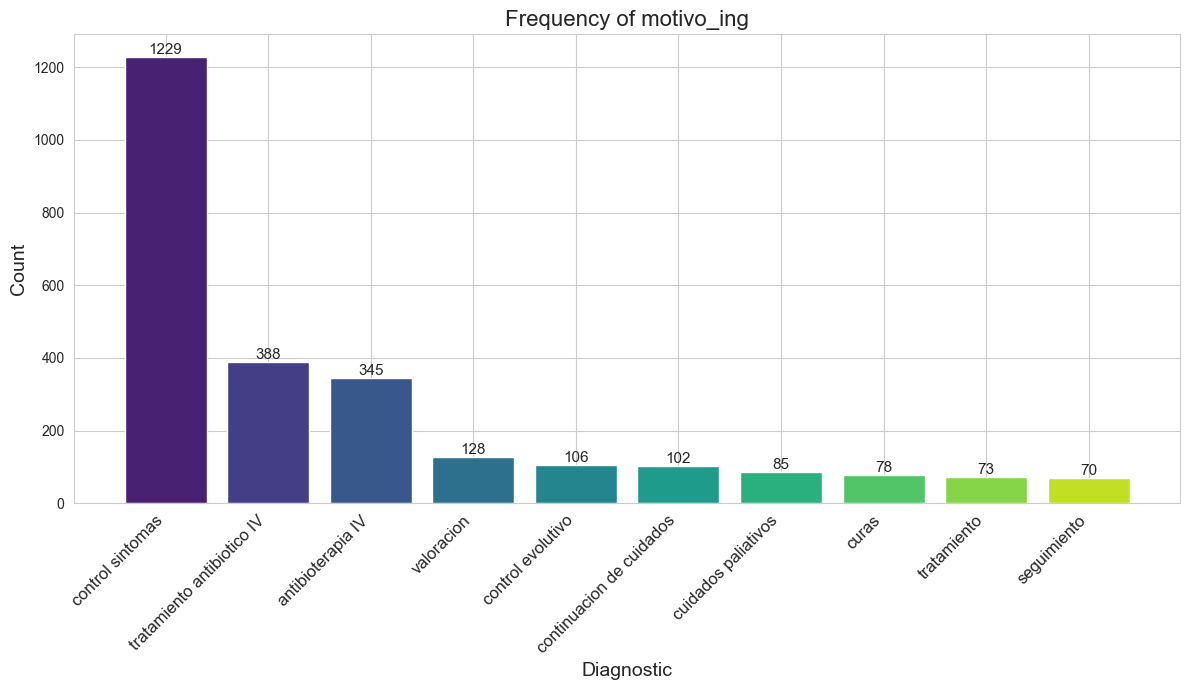

In [13]:
# Create the frequency plot
# Establecer el estilo de Seaborn
sns.set_style("whitegrid")

# Crear el plot
fig, ax = plt.subplots(figsize=(12,7))

# Obtener los 10 síntomas más comunes y sus frecuencias
top_sintomas = ing_freq.head(10)
bar_colors = sns.color_palette("viridis", len(top_sintomas))

# Crear el gráfico de barras
bars = plt.bar(top_sintomas.index, top_sintomas.values, color=bar_colors)

# Rotar las etiquetas del eje x para mejor lectura
plt.xticks(rotation=45, ha="right", fontsize=12)

# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            '%d' % int(height), ha='center', va='bottom', fontsize=11)

# Configurar etiquetas y título
plt.xlabel('Diagnostic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Frequency of motivo_ing', fontsize=16)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

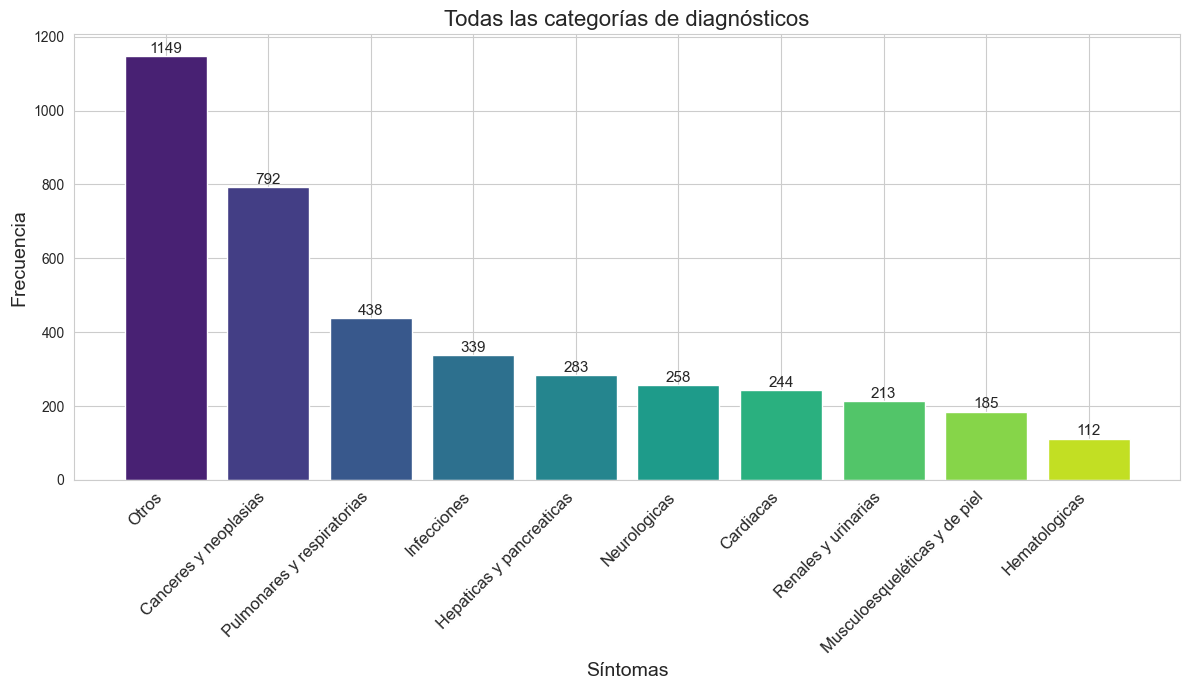

In [14]:
# Create the frequency plot
# Establecer el estilo de Seaborn
sns.set_style("whitegrid")

# Crear el plot
fig, ax = plt.subplots(figsize=(12,7))

# Obtener los 10 síntomas más comunes y sus frecuencias
top_categ = df['diagnosis_category'].value_counts()
bar_colors = sns.color_palette("viridis", len(top_categ))

# Crear el gráfico de barras
bars = plt.bar(top_categ.index, top_categ.values, color=bar_colors)

# Rotar las etiquetas del eje x para mejor lectura
plt.xticks(rotation=45, ha="right", fontsize=12)

# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            '%d' % int(height), ha='center', va='bottom', fontsize=11)

# Configurar etiquetas y título
plt.xlabel('Síntomas', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Todas las categorías de diagnósticos', fontsize=16)

# Mostrar el gráfico
plt.tight_layout()
plt.show()